<a href="https://colab.research.google.com/github/codersuryans/SPAM-EMAIL/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [3]:
df = pd.read_csv("/content/spam.csv")

In [4]:
df.head(50)


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [5]:
# Check dataset shape
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

# Check column information
df.info()


Dataset has 5572 rows and 2 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
# Check missing values
print(df.isnull().sum())

Category    0
Message     0
dtype: int64


In [8]:
df.dtypes

,0
Category,object
Message,object


In [9]:
print(f"Duplicates in dataset: {df.duplicated().sum()}")


Duplicates in dataset: 415


In [10]:
df.drop_duplicates(inplace=True)


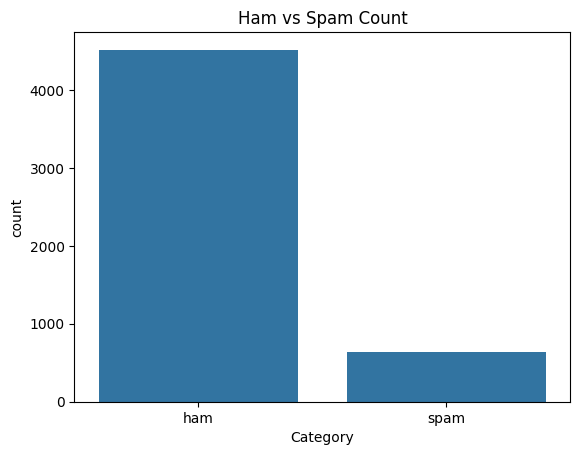

In [11]:
sns.countplot(x='Category', data=df)
plt.title("Ham vs Spam Count")
plt.show()

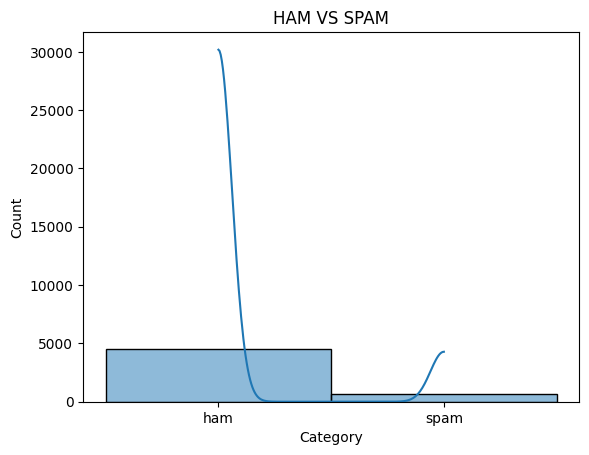

In [12]:

sns.histplot(df['Category'], bins=10, kde=True)
plt.title("HAM VS SPAM")
plt.show()


In [15]:
df['char_count'] = df['Message'].apply(len)
df['word_count'] = df['Message'].apply(lambda x: len(x.split()))
df.groupby('Category')[['char_count', 'word_count']].mean()


,char_count,word_count
Category,,
ham,70.869353,14.239814
spam,137.118565,23.659906


In [16]:
from collections import Counter
import re

def get_words(text):
    words = re.findall(r'\b\w+\b', text.lower())
    return words

spam_words = df[df['Category']=='spam']['Message'].apply(get_words).sum()
ham_words = df[df['Category']=='ham']['Message'].apply(get_words).sum()

print(Counter(spam_words).most_common(20))
print(Counter(ham_words).most_common(20))


[('to', 582), ('a', 326), ('call', 300), ('you', 257), ('your', 237), ('free', 190), ('2', 184), ('for', 182), ('the', 179), ('now', 162), ('or', 156), ('u', 142), ('is', 138), ('txt', 132), ('on', 121), ('from', 120), ('ur', 119), ('4', 112), ('have', 111), ('stop', 110)]
[('i', 2793), ('you', 1880), ('to', 1481), ('the', 1062), ('a', 975), ('u', 930), ('and', 826), ('in', 762), ('me', 732), ('my', 679), ('it', 664), ('is', 656), ('that', 546), ('for', 481), ('s', 479), ('of', 479), ('have', 426), ('so', 421), ('can', 421), ('but', 420)]


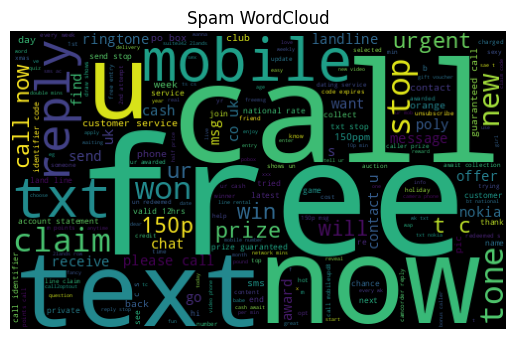

In [17]:
from wordcloud import WordCloud

spam_wc = WordCloud(width=500, height=300, background_color="black").generate(" ".join(spam_words))
plt.imshow(spam_wc)
plt.axis("off")
plt.title("Spam WordCloud")
plt.show()
